# --- ÖĞRENCİ BİLGİLERİ ---

**Adınız:** Muhammed Emin  
**Soyadınız:** Oshan  
**Okul Numaranız:** 2212729007  
**GitHub Repo Bağlantısı:** https://github.com/eminoshan/1.odev-CNN

---

# MODEL 2: BASIT CNN MİMARİSİ

Bu notebook'ta, CIFAR-10 örneğindeki gibi basit bir Convolutional Neural Network (CNN) mimarisi tanımlayıp kendi verisetiniz üzerinde eğiteceğiz. Transfer learning kullanmadan sıfırdan bir model oluşturacağız.

## Basit CNN Mimarisi

Bu modelde, **sıfırdan** bir CNN oluşturacağız. Transfer learning kullanmayız, tüm ağırlıklar rastgele başlatılır.

### Model Yapısı:

```
Input(128,128,3)
    ↓
Conv2D(32, 3×3) → ReLU → MaxPool(2×2) → Dropout(0.25)
    ↓
Conv2D(64, 3×3) → ReLU → MaxPool(2×2) → Dropout(0.25)
    ↓
Conv2D(128, 3×3) → ReLU → MaxPool(2×2) → Dropout(0.25)
    ↓
Flatten → Dense(512, ReLU) → Dropout(0.5) → Dense(num_classes, Softmax)
```

### Katman Açıklamaları:

- **Conv2D(32):** 32 filtreli konvolüsyon katmanı, 3×3 filtre boyutu
- **MaxPooling2D:** En yüksek değeri seçip örneklemeyi azalt, boyut küçült
- **Dropout:** Aşırı uydurmayı engelle
- **Padding='same':** Çıktı boyutunu giriş boyutuyla eşleştir
- **ReLU:** max(0, x) aktivasyonu - nonlinearlik

### CIFAR-10 Bağlantısı:

CIFAR-10 verisetinde bu tür basit CNN'ler %80+ doğruluk elde eder. Bizim verisetimizde benzer bir mimari kullanyıyoruz ama daha az sınıf ve daha az veri olabilir.

---

## Eğitim Ayarları

- **Epochs:** 20 (Model1'den daha fazla)
- **Batch Size:** 32
- **Learning Rate:** 0.001 (Adam optimizer'ın varsayılanı)
- **Validation Split:** %20
- **Loss Function:** Categorical Crossentropy

### Beklenen Sonuçlar:

Model1 (Transfer Learning) genellikle daha iyi sonuç verir çünkü ImageNet'teki genel özelliklerden yararlanır. Model2 daha yavaş öğrenebilir ama kendi özelliklerini bulur.

---

In [6]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. AYARLAR
DATASET_PATH = './dataset'

# Dataset klasörü kontrolü
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"'{DATASET_PATH}' klasörü bulunamadı. Lütfen dataset klasörünü oluşturun.")

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 20  # Model2'de daha fazla epoch

print(f"Dataset Path: {DATASET_PATH}")
print(f"Bulunmuş Sınıflar: {os.listdir(DATASET_PATH)}")

Dataset Path: ./dataset
Bulunmuş Sınıflar: ['sinif1', 'sinif2']


In [7]:
# 2. VERİ YÜKLEME (%20 Validation split)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print(f"Sınıf Sayısı: {train_generator.num_classes}")
print(f"Sınıf Etiketleri: {train_generator.class_indices}")
print(f"Eğitim Örneği Sayısı: {train_generator.samples}")
print(f"Doğrulama Örneği Sayısı: {val_generator.samples}")

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Sınıf Sayısı: 2
Sınıf Etiketleri: {'sinif1': 0, 'sinif2': 1}
Eğitim Örneği Sayısı: 80
Doğrulama Örneği Sayısı: 20


In [8]:
# 3. BASIT CNN MODELİ (CIFAR-10 Örneği Gibi)
# Sıfırdan tanımlanan basit CNN mimarisi

model = models.Sequential([
    # İlk Konvolüsyon Bloğu
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # İkinci Konvolüsyon Bloğu
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Üçüncü Konvolüsyon Bloğu
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Tam Bağlı Katmanlar
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Model derleme
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel2 Mimarisi:")
model.summary()


Model2 Mimarisi:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,065,762 (65.10 MB)

 Trainable params: 17,065,762 (65.10 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 4. EĞİTİM
print("\nModel2 Eğitiliyor...")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    verbose=1
)


Model2 Eğitiliyor...
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5500 - loss: 1.0673 - val_accuracy: 0.5000 - val_loss: 0.6849
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 835ms/step - accuracy: 0.5625 - loss: 0.6963 - val_accuracy: 0.5000 - val_loss: 0.7074
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5000 - loss: 0.6980 - val_accuracy: 0.5000 - val_loss: 0.6947
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 857ms/step - accuracy: 0.4875 - loss: 0.6878 - val_accuracy: 0.5000 - val_loss: 0.6949
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 881ms/step - accuracy: 0.5125 - loss: 0.6886 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 858ms/step - accuracy: 0.5250 - loss: 0.6800 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 857ms/step - accuracy: 0.5625 - loss: 0.6680 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 868ms/step - accuracy: 0.6500 - loss: 0.6290 - val_accuracy: 0.

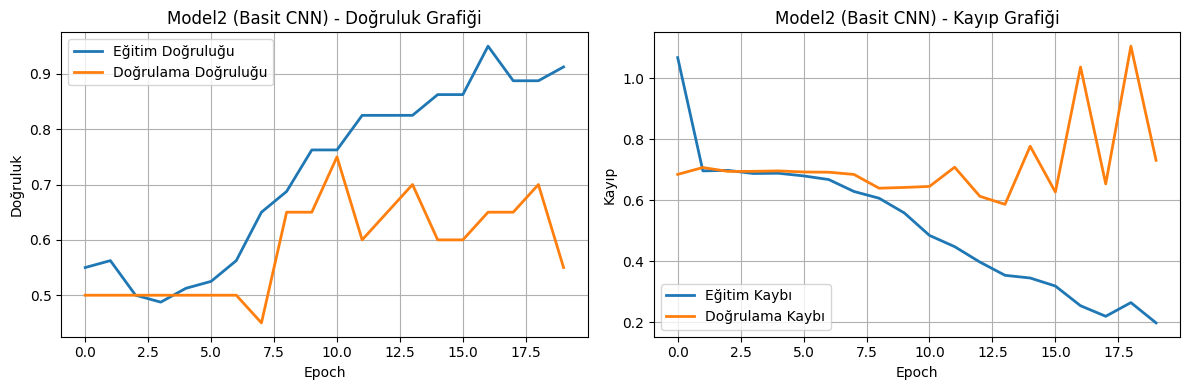

In [10]:
# 5. GRAFİKLER (Doğruluk ve Kayıp)
plt.figure(figsize=(12, 4))

# Doğruluk Grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Model2 (Basit CNN) - Doğruluk Grafiği')
plt.legend()
plt.grid(True)

# Kayıp Grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı', linewidth=2)
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Model2 (Basit CNN) - Kayıp Grafiği')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# 6. TEST SONUÇLARI
print("\n" + "="*50)
print("TEST SONUÇLARI - MODEL2")
print("="*50)
loss, accuracy = model.evaluate(val_generator)
print(f"Test Kaybı: {loss:.4f}")
print(f"Test Doğruluğu: {accuracy*100:.2f}%")
print("="*50)

# En iyi doğruluk değerini kaydet
best_val_accuracy = max(history.history['val_accuracy'])
print(f"\nEn İyi Doğrulama Doğruluğu: {best_val_accuracy*100:.2f}%")


TEST SONUÇLARI - MODEL2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - accuracy: 0.5500 - loss: 0.7309
Test Kaybı: 0.7309
Test Doğruluğu: 55.00%

En İyi Doğrulama Doğruluğu: 75.00%
